In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

df=pd.read_csv("./statheaddata.csv", comment="#")
playoffDf=pd.read_csv("./playoffteamstats.csv", comment="#")


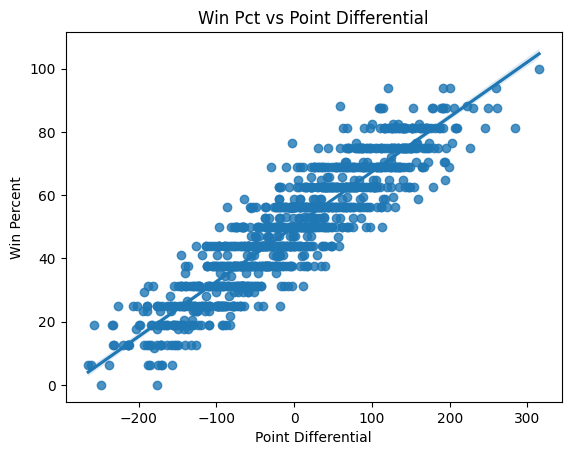

In [3]:
#Point Differential Calculations
ptDif=df[["W-L%", "PtDif"]]
ptDif=ptDif.assign(winpct=lambda x: x["W-L%"]*100)

sns.regplot(ptDif, y="winpct", x="PtDif")
plt.title("Win Pct vs Point Differential")
plt.xlabel("Point Differential")
plt.ylabel("Win Percent")
ptDifRegress=sp.linregress(y=ptDif["winpct"], x=ptDif["PtDif"])

# slope=0.17346054792633464, 
# intercept=50.02396694214876, 
# rvalue=0.9108098097984665, 
# pvalue=0.0, 
# stderr=0.0023846547921569723, 
# intercept_stderr=0.23813358634855525



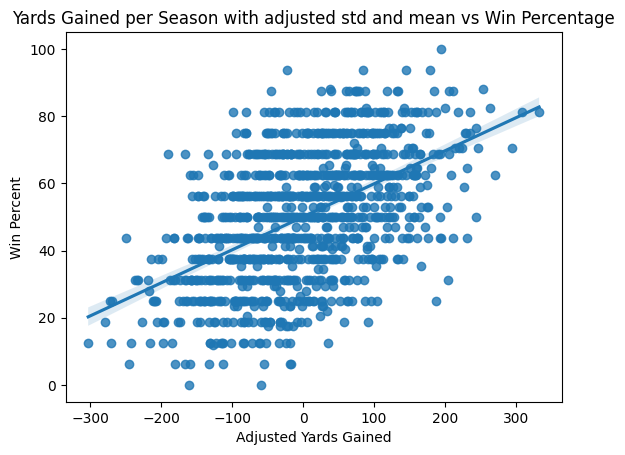

In [4]:
# Yards Gained

# Eq to standarize data so it all has the same mean and std as point differential
# and therefore weighted the same

# 𝑦=𝑚2+(𝑥−𝑚1)×𝑠2/𝑠1

m2=ptDif["PtDif"].mean() #0
s2=ptDif["PtDif"].std() #99.90670280169336

ydsGained=df[["W-L%", "Tot"]]
ydsGained=ydsGained.assign(winpct=lambda x: x["W-L%"]*100)

ygm1=ydsGained["Tot"].mean()
ygs1=ydsGained["Tot"].std()

ydsGained=ydsGained.assign(adjTot=lambda x: m2+(x["Tot"]-ygm1)*(s2/ygs1))

sns.regplot(ydsGained, y="winpct", x="adjTot")
plt.title("Yards Gained per Season with adjusted std and mean vs Win Percentage")
plt.xlabel("Adjusted Yards Gained")
plt.ylabel("Win Percent")

ydsGainedRegress=sp.linregress(y=ydsGained["winpct"], x=ydsGained["adjTot"])

# slope=0.09822067738442092, 
# intercept=50.02396694214875, 
# rvalue=0.5157389248232576, 
# pvalue=4.789686840654398e-75, 
# stderr=0.004948917626394197, 
# intercept_stderr=0.49420297931292917



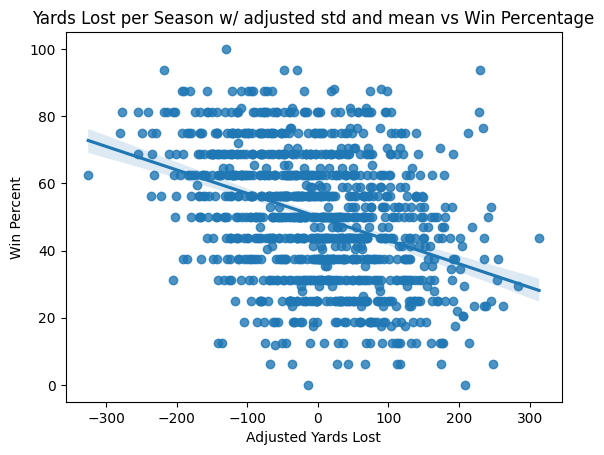

In [5]:
# Yards Lost
ydsLost=df[["W-L%", "TotOpp"]]

yls1=ydsLost["TotOpp"].std()
ylm1=ydsLost["TotOpp"].mean()

ydsLost=ydsLost.assign(adjTotOpp=lambda x: m2+(x["TotOpp"]-ylm1)*(s2/yls1))
ydsLost=ydsLost.assign(winpct=lambda x: x["W-L%"]*100)


sns.regplot(ydsLost, y="winpct", x="adjTotOpp")
plt.title("Yards Lost per Season w/ adjusted std and mean vs Win Percentage")
plt.xlabel("Adjusted Yards Lost")
plt.ylabel("Win Percent")

ydsLostRegress=sp.linregress(y=ydsLost["winpct"], x=ydsLost["adjTotOpp"])

# slope=-0.0698769910747289, 
# intercept=50.02396694214876, 
# rvalue=-0.3669113796244413, 
# pvalue=4.8694759015985625e-36, 
# stderr=0.005373542344062263, 
# intercept_stderr=0.5366063524146083




In [9]:
# Regression CIs (for the slope of the regression)
# t calculated where n-2=1086 (34*32) with 90% confidence
# ptDif
print(sp.t.interval(0.90, 1086, ptDifRegress.slope, ptDifRegress.stderr))
# (0.16953479105431488, 0.1773863047983544)

#ydsGained
print(sp.t.interval(0.90, 1086, ydsGainedRegress.slope, ydsGainedRegress.stderr))
# (0.09007348247605286, 0.10636787229278898)

# ydsLost
print(sp.t.interval(0.90, 1086, ydsLostRegress.slope, ydsLostRegress.stderr))
# (-0.07872322779363385, -0.06103075435582397)

(0.16953479105431488, 0.1773863047983544)
(0.09007348247605286, 0.10636787229278898)
(-0.07872322779363385, -0.06103075435582397)


In [8]:
# Scores for each team
scores=[]
for i, rows in playoffDf.iterrows():
    teamScore=[rows["Team"]]
    x=ptDifRegress.rvalue*(rows["PtDif"]*ptDifRegress.slope+ptDifRegress.intercept)
    
    totnorm=m2+(rows["Tot"]-ygm1)*s2/ygs1
    y=ydsGainedRegress.rvalue*(totnorm*ydsGainedRegress.slope+ydsGainedRegress.intercept)
    
    totOppNorm=m2+(rows["TotOpp"]-ylm1)*s2/yls1
    z=ydsLostRegress.rvalue*(totOppNorm*ydsLostRegress.slope+ydsLostRegress.intercept)

    teamScore.append(x+y-z)
    scores.append(teamScore)
for i in scores:
    print(i)

"""
Final Modified Scores for each team
['DET', 135.32325629367986]
['KAN', 100.36378128189288]
['MIN', 108.24183741744484]
['PHI', 124.9710720981851]
['BUF', 118.38612061038262]
['BAL', 128.5609610291265]
['WAS', 111.0017253663754]
['GNB', 116.56381791287868]
['LAC', 106.24045646168551]
['DEN', 108.92590519763704]
['HOU', 90.43172081719213]
['PIT', 94.67324206860124]
['LAR', 85.947982564442]
['TAM', 117.45339695925381]
"""


['DET', 135.32325629367986]
['KAN', 100.36378128189288]
['MIN', 108.24183741744484]
['PHI', 124.9710720981851]
['BUF', 118.38612061038262]
['BAL', 128.5609610291265]
['WAS', 111.0017253663754]
['GNB', 116.56381791287868]
['LAC', 106.24045646168551]
['DEN', 108.92590519763704]
['HOU', 90.43172081719213]
['PIT', 94.67324206860124]
['LAR', 85.947982564442]
['TAM', 117.45339695925381]


"\nFinal Modified Scores for each team\n['DET', 103.23150145191303]\n['KAN', 64.81251400420915]\n['MIN', 75.04378862598101]\n['PHI', 82.67891202531366]\n['BUF', 86.16311055424498]\n['BAL', 93.57221609874634]\n['WAS', 76.45362294138302]\n['GNB', 80.03751189986878]\n['LAC', 71.27983764867051]\n['DEN', 72.81211557264973]\n['HOU', 53.98041778382269]\n['PIT', 60.08763815378862]\n['LAR', 55.571920881951044]\n['TAM', 85.26788839293638] \n"